## Assignment 8 

In [2]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [4]:
tf.random.set_seed(42)
np.random.seed(42)

In [77]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

C:\Users\bense\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [78]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])

In [5]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [80]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7976 - loss: 0.5653 - val_accuracy: 0.8756 - val_loss: 0.3456
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8683 - loss: 0.3643 - val_accuracy: 0.8804 - val_loss: 0.3443
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8866 - loss: 0.3132 - val_accuracy: 0.8872 - val_loss: 0.3395
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9001 - loss: 0.2728 - val_accuracy: 0.8890 - val_loss: 0.3447
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9147 - loss: 0.2368 - val_accuracy: 0.8856 - val_loss: 0.3686


In [6]:
X_train_scaled.shape

(55000, 28, 28)

In [7]:
small_x_train = X_train_scaled.copy()
small_y_train = y_train.copy()


small_x_train = np.array_split(small_x_train, 2)[0]
small_x_train.shape

(27500, 28, 28)

Problem Entry:
I was recieving this error: "'NoneType' object has no attribute 'shape'" when trying to call results.append(small_x_train.shape[0]).
The above code shows that it whould work just fine, but something else was messing it up.

Nevermind, I was looking at the wrong thing, I was trying to call model.evaluate() with no parameters oops

In [83]:
small_x_train = X_train_scaled.copy()
small_y_train = y_train.copy()
results = []
while small_x_train.shape[0] >= 199:
    small_x_train = np.array_split(small_x_train, 2)[0]
    small_y_train = np.array_split(small_y_train, 2)[0]

    early_stop_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")])
    early_stop_model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])
    
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
    model_checkpoint_cb = keras.callbacks.ModelCheckpoint(f"{small_x_train.shape[0]}_best_model.keras", save_best_only=True)
    run_index = 1 # increment every time you train the model
    run_logdir = os.path.join(os.curdir, "logs", "run_{:03d}".format(run_index))
    tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
    callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]


    early_stop_model.fit(small_x_train, small_y_train, epochs=25, validation_data=(X_valid_scaled, y_valid), callbacks=callbacks)
    results.append([small_x_train.shape[0], early_stop_model.evaluate(X_test_scaled, y_test)[1]])


Epoch 1/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7677 - loss: 0.6603 - val_accuracy: 0.8506 - val_loss: 0.4222
Epoch 2/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8558 - loss: 0.3990 - val_accuracy: 0.8564 - val_loss: 0.4164
Epoch 3/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8788 - loss: 0.3347 - val_accuracy: 0.8566 - val_loss: 0.4352
Epoch 4/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8966 - loss: 0.2814 - val_accuracy: 0.8658 - val_loss: 0.4422
Epoch 5/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9152 - loss: 0.2400 - val_accuracy: 0.8688 - val_loss: 0.4599
Epoch 6/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9247 - loss: 0.2082 - val_accuracy: 0.8698 - val_loss: 0.4966
Epoch 7/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9406 - loss: 0.1740 - val_accuracy: 0.8688 - val_loss: 0.5348
Epoch 8/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9458 - loss: 0.1500 - val_accuracy: 0.

In [84]:
results

[[27500, 0.8650000095367432],
 [13750, 0.8549000024795532],
 [6875, 0.8222000002861023],
 [3438, 0.8129000067710876],
 [1719, 0.8098999857902527],
 [860, 0.7932999730110168],
 [430, 0.7547000050544739],
 [215, 0.7318999767303467],
 [108, 0.6675000190734863]]

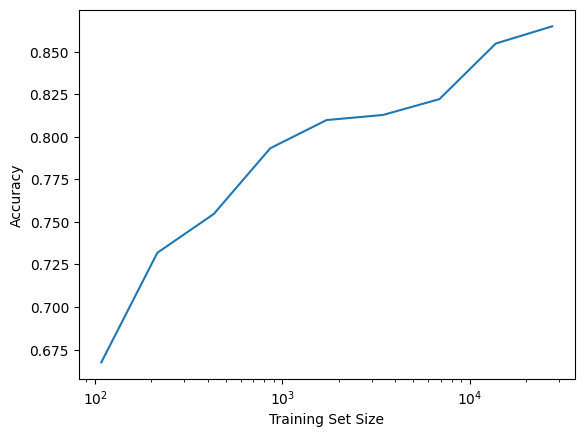

In [114]:
plt.plot([x for x, _ in results], [y for _, y in results])
plt.xlabel("Training Set Size")
plt.xscale("log")
plt.ylabel("Accuracy")
plt.show()

Problem:

Autoencoder is producing a binary accuracy of 0.00000000 for everything, when in the notebook it was achieving normal results. 

It must be with the data it was trained on, can't use normal X_train_scaled, but does that mess up the final classification model?

Training classifier model with this messed up encoder still produces reasonable results, just slightly worse then those without the encoder layers within in.

In [8]:
(X_train_full2, y_train_full2), (X_test2, y_test2) = keras.datasets.fashion_mnist.load_data()
X_train_full2 = X_train_full2.astype(np.float32) / 255
X_test2 = X_test2.astype(np.float32) / 255
X_train2, X_valid2 = X_train_full2[:-5000], X_train_full2[-5000:]
y_train2, y_valid2 = y_train_full2[:-5000], y_train_full2[-5000:]

In [99]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=["binary_accuracy"])
history = stacked_ae.fit(X_train2, X_train2, epochs=20,
                         validation_data=(X_valid2, X_valid2))

Epoch 1/20


C:\Users\bense\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\bense\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - binary_accuracy: 0.4902 - loss: 0.3768 - val_binary_accuracy: 0.5031 - val_loss: 0.3145
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - binary_accuracy: 0.5063 - loss: 0.3064 - val_binary_accuracy: 0.5014 - val_loss: 0.3082
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - binary_accuracy: 0.5074 - loss: 0.2987 - val_binary_accuracy: 0.5035 - val_loss: 0.2972
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - binary_accuracy: 0.5079 - loss: 0.2942 - val_binary_accuracy: 0.5043 - val_loss: 0.2935
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - binary_accuracy: 0.5082 - loss: 0.2913 - val_binary_accuracy: 0.5041 - val_loss: 0.2921
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.5084 - loss: 0.2893 - val_binary_accuracy: 0.5040 - val_loss: 0.2928
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - binary_accuracy: 0.5086 - loss: 0.2878 - val_binary_accuracy: 0.5050 - val_loss: 0.2888
Epo

In [101]:
keras.models.save_model(stacked_ae, "stacked_ae.keras")

In [102]:
model_A = keras.models.load_model("stacked_ae.keras")
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights()) # i didnt actually need to save this cuz im just gonna save the B model

In [103]:
model_B_on_A = keras.models.Sequential(model_A_clone.layers)
for layer in model_B_on_A.layers:
    layer.trainable = False

In [104]:
model_B_on_A.summary()

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_56 (Sequential)      │ (None, 30)             │        81,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_57 (Sequential)      │ (None, 28, 28)         │        82,284 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163,814 (639.90 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 163,814 (639.90 KB)

In [105]:
keras.models.save_model(model_B_on_A, "model_B_on_A.keras")

In [117]:
small_x_train = X_train2.copy()
small_y_train = y_train2.copy()
results_ae = []
while small_x_train.shape[0] >= 199:
    small_x_train = np.array_split(small_x_train, 2)[0]
    small_y_train = np.array_split(small_y_train, 2)[0]

    model_b_cur = keras.models.load_model("model_B_on_A.keras")
    cloned_model_b = keras.models.clone_model(model_b_cur)
    cloned_model_b.set_weights(model_b_cur.get_weights())

    cloned_model_b.add(keras.layers.Flatten(input_shape=[28, 28]))
    cloned_model_b.add(keras.layers.BatchNormalization())
    cloned_model_b.add(keras.layers.Dense(300, activation="relu"))
    cloned_model_b.add(keras.layers.BatchNormalization())
    cloned_model_b.add(keras.layers.Dense(100, activation="relu"))
    cloned_model_b.add(keras.layers.BatchNormalization())
    cloned_model_b.add(keras.layers.Dense(10, activation="softmax"))

    cloned_model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])
    
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
    model_checkpoint_cb = keras.callbacks.ModelCheckpoint(f"ae_{small_x_train.shape[0]}_best_model.keras", save_best_only=True)
    run_index = 1 # increment every time you train the model
    run_logdir = os.path.join(os.curdir, "logs", "run_{:03d}".format(run_index))
    tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
    callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]


    cloned_model_b.fit(small_x_train, small_y_train, epochs=25, validation_data=(X_valid2, y_valid2), callbacks=callbacks)
    results_ae.append([small_x_train.shape[0], cloned_model_b.evaluate(X_test2, y_test2)[1]])


Epoch 1/25


C:\Users\bense\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


860/860 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7517 - loss: 0.6849 - val_accuracy: 0.8282 - val_loss: 0.4733
Epoch 2/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8187 - loss: 0.4792 - val_accuracy: 0.8354 - val_loss: 0.4433
Epoch 3/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8357 - loss: 0.4331 - val_accuracy: 0.8396 - val_loss: 0.4338
Epoch 4/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8463 - loss: 0.4027 - val_accuracy: 0.8384 - val_loss: 0.4330
Epoch 5/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8549 - loss: 0.3771 - val_accuracy: 0.8446 - val_loss: 0.4332
Epoch 6/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8633 - loss: 0.3556 - val_accuracy: 0.8448 - val_loss: 0.4290
Epoch 7/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8728 - loss: 0.3336 - val_accuracy: 0.8446 - val_loss: 0.4367
Epoch 8/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8795 - loss: 0.3155 - val_accuracy: 0.8388 - val_

In [118]:
cloned_model_b.summary()

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_56 (Sequential)      │ (None, 30)             │        81,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_57 (Sequential)      │ (None, 28, 28)         │        82,284 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_90 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_258         │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_274 (Dense)               │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_259         │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_275 (Dense)               │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_260         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_276 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 973,118 (3.71 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 166,182 (649.15 KB)

 Optimizer params: 537,958 (2.05 MB)

In [119]:
results_ae

[[27500, 0.8334000110626221],
 [13750, 0.8273000121116638],
 [6875, 0.8206999897956848],
 [3438, 0.8003000020980835],
 [1719, 0.8047000169754028],
 [860, 0.7950999736785889],
 [430, 0.7666000127792358],
 [215, 0.7184000015258789],
 [108, 0.6517999768257141]]

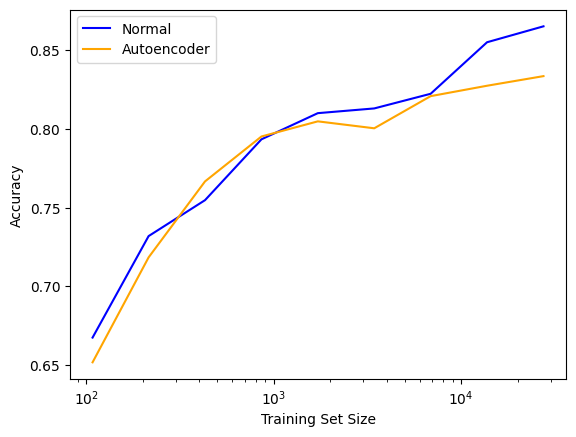

In [120]:
plt.plot([x for x, _ in results], [y for _, y in results], color="blue", label="Normal")
plt.plot([x for x, _ in results_ae], [y for _, y in results_ae], color="orange", label="Autoencoder")
plt.xlabel("Training Set Size")
plt.xscale("log")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Experimentation: unfreezing the layers

In [12]:
small_x_train = X_train2.copy()
small_y_train = y_train2.copy()
results_trainable = []
while small_x_train.shape[0] >= 199:
    small_x_train = np.array_split(small_x_train, 2)[0]
    small_y_train = np.array_split(small_y_train, 2)[0]

    model_b_cur = keras.models.load_model("model_B_on_A.keras")
    cloned_model_b = keras.models.clone_model(model_b_cur)
    cloned_model_b.set_weights(model_b_cur.get_weights())
    for layer in cloned_model_b.layers:
        layer.trainable = True

    cloned_model_b.add(keras.layers.Flatten(input_shape=[28, 28]))
    cloned_model_b.add(keras.layers.BatchNormalization())
    cloned_model_b.add(keras.layers.Dense(300, activation="relu"))
    cloned_model_b.add(keras.layers.BatchNormalization())
    cloned_model_b.add(keras.layers.Dense(100, activation="relu"))
    cloned_model_b.add(keras.layers.BatchNormalization())
    cloned_model_b.add(keras.layers.Dense(10, activation="softmax"))

    cloned_model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])
    
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
    model_checkpoint_cb = keras.callbacks.ModelCheckpoint(f"trainable_{small_x_train.shape[0]}_best_model.keras", save_best_only=True)
    run_index = 1 # increment every time you train the model
    run_logdir = os.path.join(os.curdir, "logs", "run_{:03d}".format(run_index))
    tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
    callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]


    cloned_model_b.fit(small_x_train, small_y_train, epochs=25, validation_data=(X_valid2, y_valid2), callbacks=callbacks)
    results_trainable.append([small_x_train.shape[0], cloned_model_b.evaluate(X_test2, y_test2)[1]])


Epoch 1/25


C:\Users\bense\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


860/860 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7571 - loss: 0.6817 - val_accuracy: 0.8240 - val_loss: 0.4821
Epoch 2/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8219 - loss: 0.4767 - val_accuracy: 0.8310 - val_loss: 0.4542
Epoch 3/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8360 - loss: 0.4314 - val_accuracy: 0.8394 - val_loss: 0.4361
Epoch 4/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8470 - loss: 0.4002 - val_accuracy: 0.8452 - val_loss: 0.4228
Epoch 5/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8571 - loss: 0.3772 - val_accuracy: 0.8464 - val_loss: 0.4192
Epoch 6/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8632 - loss: 0.3574 - val_accuracy: 0.8450 - val_loss: 0.4245
Epoch 7/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8700 - loss: 0.3392 - val_accuracy: 0.8450 - val_loss: 0.4325
Epoch 8/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8777 - loss: 0.3180 - val_accuracy: 0.8464 - val_

In [126]:
cloned_model_b.summary()

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_56 (Sequential)      │ (None, 30)             │        81,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_57 (Sequential)      │ (None, 28, 28)         │        82,284 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_99 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_285         │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_301 (Dense)               │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_286         │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_302 (Dense)               │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_287         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_303 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 973,118 (3.71 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 166,182 (649.15 KB)

 Optimizer params: 537,958 (2.05 MB)

In [13]:
results_trainable

[[27500, 0.8367000222206116],
 [13750, 0.8274000287055969],
 [6875, 0.8199999928474426],
 [3438, 0.8062000274658203],
 [1719, 0.7882999777793884],
 [860, 0.7914999723434448],
 [430, 0.7745000123977661],
 [215, 0.7110000252723694],
 [108, 0.6266000270843506]]

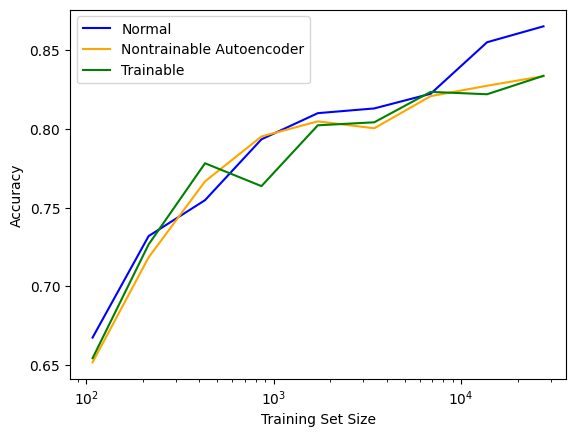

In [122]:
plt.plot([x for x, _ in results], [y for _, y in results], color="blue", label="Normal")
plt.plot([x for x, _ in results_ae], [y for _, y in results_ae], color="orange", label="Nontrainable Autoencoder")
plt.plot([x for x, _ in results_trainable], [y for _, y in results_trainable], color="green", label="Trainable")
plt.xlabel("Training Set Size")
plt.xscale("log")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Experimentation: no early stopping

In [10]:
small_x_train = X_train2.copy()
small_y_train = y_train2.copy()
results_unstopped = []
while small_x_train.shape[0] >= 199:
    small_x_train = np.array_split(small_x_train, 2)[0]
    small_y_train = np.array_split(small_y_train, 2)[0]

    model_b_cur = keras.models.load_model("model_B_on_A.keras")
    cloned_model_b = keras.models.clone_model(model_b_cur)
    cloned_model_b.set_weights(model_b_cur.get_weights())


    cloned_model_b.add(keras.layers.Flatten(input_shape=[28, 28]))
    cloned_model_b.add(keras.layers.BatchNormalization())
    cloned_model_b.add(keras.layers.Dense(300, activation="relu"))
    cloned_model_b.add(keras.layers.BatchNormalization())
    cloned_model_b.add(keras.layers.Dense(100, activation="relu"))
    cloned_model_b.add(keras.layers.BatchNormalization())
    cloned_model_b.add(keras.layers.Dense(10, activation="softmax"))

    cloned_model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])


    cloned_model_b.fit(small_x_train, small_y_train, epochs=25, validation_data=(X_valid2, y_valid2))
    results_unstopped.append([small_x_train.shape[0], cloned_model_b.evaluate(X_test2, y_test2)[1]])


Epoch 1/25


C:\Users\bense\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


860/860 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7616 - loss: 0.6747 - val_accuracy: 0.8222 - val_loss: 0.4758
Epoch 2/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8193 - loss: 0.4784 - val_accuracy: 0.8310 - val_loss: 0.4455
Epoch 3/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8356 - loss: 0.4329 - val_accuracy: 0.8362 - val_loss: 0.4393
Epoch 4/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8481 - loss: 0.4039 - val_accuracy: 0.8372 - val_loss: 0.4375
Epoch 5/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8562 - loss: 0.3776 - val_accuracy: 0.8396 - val_loss: 0.4340
Epoch 6/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8646 - loss: 0.3583 - val_accuracy: 0.8446 - val_loss: 0.4342
Epoch 7/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8743 - loss: 0.3362 - val_accuracy: 0.8426 - val_loss: 0.4346
Epoch 8/25
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8805 - loss: 0.3167 - val_accuracy: 0.8436 - val_

In [11]:
results_unstopped

[[27500, 0.8309000134468079],
 [13750, 0.8270999789237976],
 [6875, 0.824400007724762],
 [3438, 0.7955999970436096],
 [1719, 0.7939000129699707],
 [860, 0.786899983882904],
 [430, 0.7706000208854675],
 [215, 0.720300018787384],
 [108, 0.6424000263214111]]

have results pasted below so I dont have to run the whole notebook each time

In [14]:
results = [[27500, 0.8650000095367432],
 [13750, 0.8549000024795532],
 [6875, 0.8222000002861023],
 [3438, 0.8129000067710876],
 [1719, 0.8098999857902527],
 [860, 0.7932999730110168],
 [430, 0.7547000050544739],
 [215, 0.7318999767303467],
 [108, 0.6675000190734863]]
results_ae = [[27500, 0.8334000110626221],
 [13750, 0.8273000121116638],
 [6875, 0.8206999897956848],
 [3438, 0.8003000020980835],
 [1719, 0.8047000169754028],
 [860, 0.7950999736785889],
 [430, 0.7666000127792358],
 [215, 0.7184000015258789],
 [108, 0.6517999768257141]]
results_trainable = [[27500, 0.8367000222206116],
 [13750, 0.8274000287055969],
 [6875, 0.8199999928474426],
 [3438, 0.8062000274658203],
 [1719, 0.7882999777793884],
 [860, 0.7914999723434448],
 [430, 0.7745000123977661],
 [215, 0.7110000252723694],
 [108, 0.6266000270843506]]
results_unstopped = [[27500, 0.8309000134468079],
 [13750, 0.8270999789237976],
 [6875, 0.824400007724762],
 [3438, 0.7955999970436096],
 [1719, 0.7939000129699707],
 [860, 0.786899983882904],
 [430, 0.7706000208854675],
 [215, 0.720300018787384],
 [108, 0.6424000263214111]]

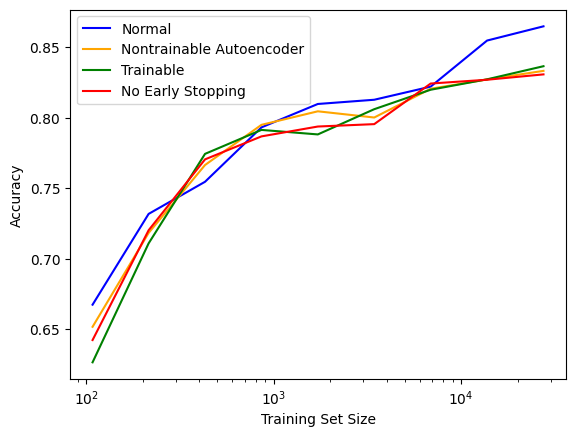

In [15]:
plt.plot([x for x, _ in results], [y for _, y in results], color="blue", label="Normal")
plt.plot([x for x, _ in results_ae], [y for _, y in results_ae], color="orange", label="Nontrainable Autoencoder")
plt.plot([x for x, _ in results_trainable], [y for _, y in results_trainable], color="green", label="Trainable")
plt.plot([x for x, _ in results_unstopped], [y for _, y in results_unstopped], color="red", label="No Early Stopping")
plt.xlabel("Training Set Size")
plt.xscale("log")
plt.ylabel("Accuracy")
plt.legend()
plt.show()